In [253]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from scipy.fftpack import dct, idct
# from scipy.optimize import minimize
# from scipy.signal import find_peaks
sys.path.append(os.path.join('..'))
from physics215ProjectCode import reconstruct_signal as rs

plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams.update({'font.size': 18})

In [ ]:
# import os
# import sys
# sys.path.append(os.path.join('..','addDependencies','UTILS'))
# sys.path.append(os.path.abspath('../physics215ProjectCode'))
# from cosamp_fn import cosamp
# from rmse import rmse

# def PSD_reconstruct_signal(n, p, freq_start, freq_end, increments):
#     ## Generate signal, DCT of signal
#     t = np.linspace(0,1,n)
#     perm = np.floor(np.random.rand(p) * n).astype(int)

#     # params
#     # reg is for uniformly spaced above nyquist frequency
#     # sub is sub nyquist
#     no_of_freq = 1
#     orig_signal = []
#     recon_reg = []
#     recon_sub = []
#     PSD_orig = []
#     PSD_reg = []
#     PSD_sub = []
#     errors_reg = []
#     errors_sub = []

#     x = np.cos(2 * freq_start * np.pi * t) # signal

#     # for regular nyquist sampling
#     p_uniform = freq_end * 2 # double the highest signal frequency
#     indices = np.linspace(0, n - 1, p_uniform, dtype=int)
    
#     for addfreq in range(freq_start + increments, freq_end + increments + 1, increments):
#         signal = x.copy()
#         orig_signal.append(signal)
#         # PSD of original signal
#         xt = np.fft.fft(x) # Fourier transformed signal
#         PSD = xt * np.conj(xt) / n # Power spectral density
#         PSD_orig.append(PSD)

#         # regular nyquist
#         # Simulate normal sampling by selecting p DCT coefficients directly
#         x_nyquist_samples = x[indices]
#         x_dct = dct(x_nyquist_samples, norm='ortho')
#         x_recon_reg = idct(x_dct, norm='ortho')
#         recon_reg.append(x_recon_reg)

#         xt_recon_reg = np.fft.fft(x_recon_reg,n) # computes the (fast) discrete fourier transform
#         PSD_recon_reg = xt_recon_reg * np.conj(xt_recon_reg)/n # Power spectrum (how much power in each freq)
#         PSD_reg.append(PSD_recon_reg)

#         # sub-nyquist
#         y = x[perm]
        
#         Psi = dct(np.identity(n)) 
#         Theta = Psi[perm,:]
        
#         s = cosamp(Theta,y,10,epsilon=1.e-10,max_iter=10) 
#         x_recon_sub = idct(s)
#         recon_sub.append(x_recon_sub)

#         xt_recon_sub = np.fft.fft(x_recon_sub,n) # computes the (fast) discrete fourier transform
#         PSD_recon_sub = xt_recon_sub * np.conj(xt_recon_sub)/n # Power spectrum (how much power in each freq)
#         PSD_sub.append(PSD_recon_sub)
        
#         #calculating rmse of reconstructed signal
#         # L = int(np.floor(n/2))

#         indices = np.linspace(0, len(signal) - 1, len(x_recon_reg), dtype=int)
#         downsampled_signal = signal[indices]

#         error_reg = rmse(downsampled_signal,x_recon_reg)
#         error_sub = rmse(signal,x_recon_sub)
#         # error_reg = rmse(PSD[:L], PSD_recon_reg[:L])
#         # error_sub = rmse(PSD[:L], PSD_recon_sub[:L])
#         errors_reg.append(f"{error_reg.real:.5g}")
#         errors_sub.append(f"{error_sub.real:.5g}")
        
#         no_of_freq += 1
#         x += np.cos(2 * addfreq * np.pi * t)

#     return orig_signal, recon_reg, recon_sub, PSD_orig, PSD_reg, PSD_sub, errors_reg, errors_sub

In [252]:
n = 4096
initial_frequency = 30
final_frequency = 630
increments = 60

p = 2 ** np.arange(3, 12)
orig_signal_per_p = []
recon_reg_per_p = []
recon_sub_per_p = []
PSD_orig_per_p = []
PSD_reg_per_p = []
PSD_sub_per_p = []
err_reg_per_p = []
err_sub_per_p = []
frequencies = np.arange(initial_frequency, final_frequency + 1, increments)
t = np.linspace(0,1,n)

for i in p:
    orig_signal, recon_reg, recon_sub, PSD_orig, PSD_reg, PSD_sub, error_reg, error_sub = PSDrs.recon(n, i, initial_frequency, final_frequency, increments)
    orig_signal_per_p.append(orig_signal)
    recon_reg_per_p.append(recon_reg)
    recon_sub_per_p.append(recon_sub)
    PSD_orig_per_p.append(PSD_orig)
    PSD_reg_per_p.append(PSD_reg)
    PSD_sub_per_p.append(PSD_sub)
    err_reg_per_p.append(error_reg)
    err_sub_per_p.append(error_sub)

AttributeError: module 'physics215ProjectCode.PSD_reconstruct_signal' has no attribute 'recon'

Plotting the original signal wile adding a cosine with a different frequency every iteration:

The same for all p

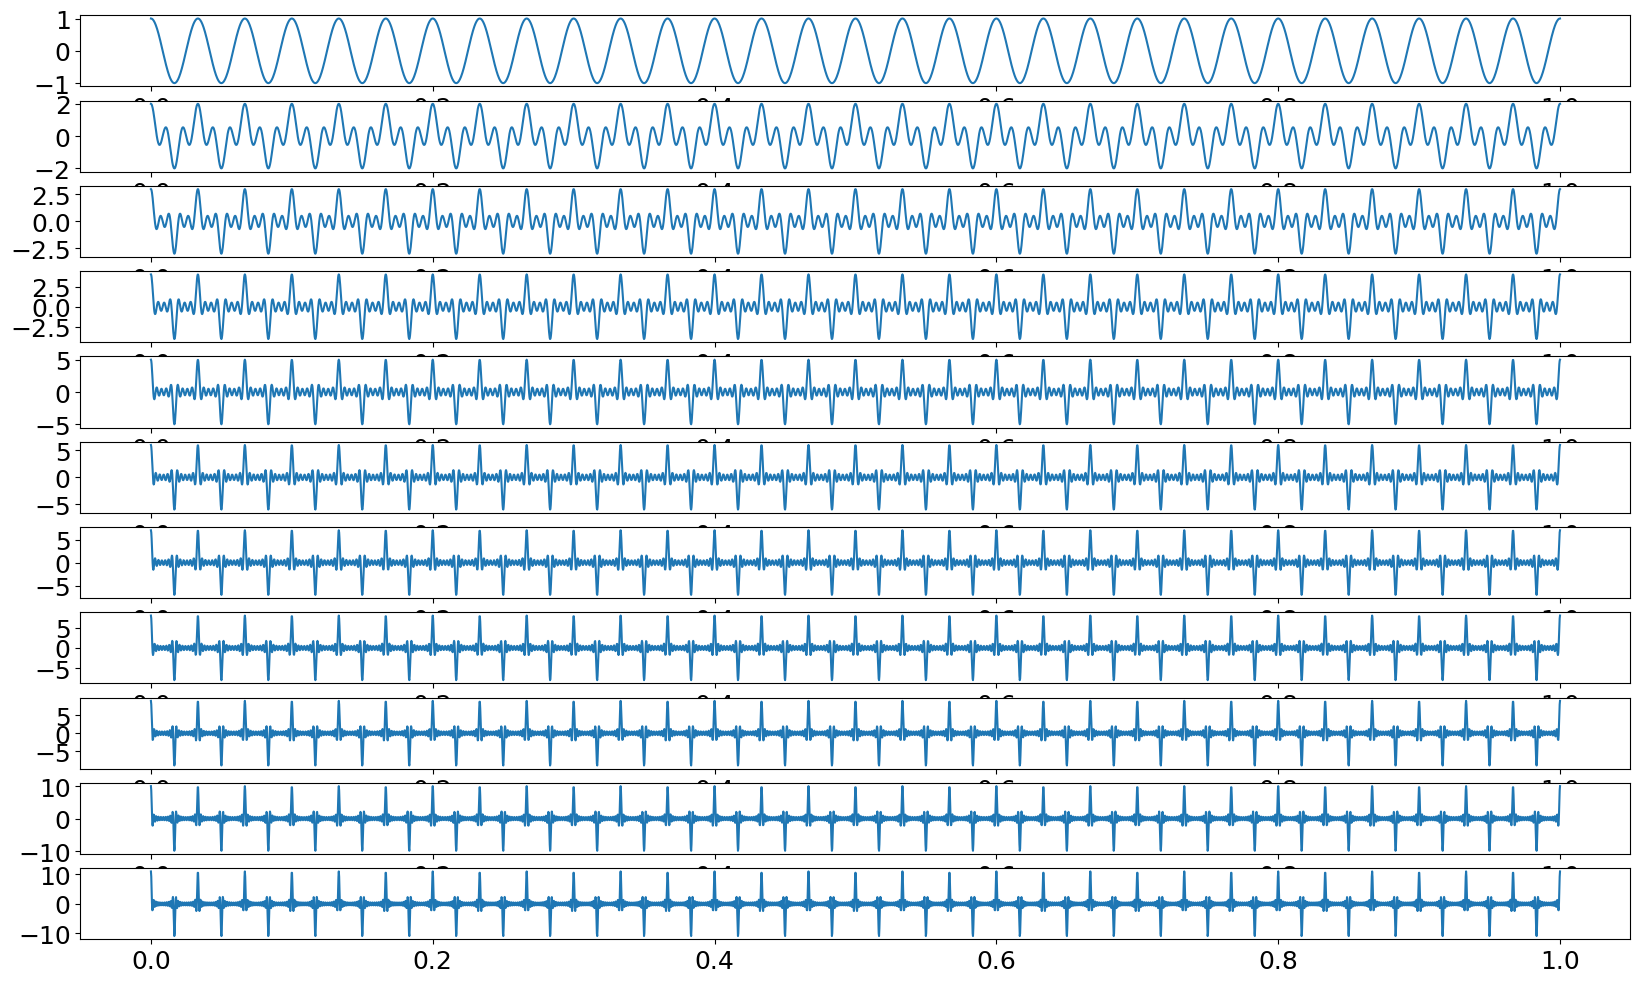

In [219]:
plt.rcParams['figure.figsize'] = [20, 12]
plt.rcParams.update({'font.size': 18})

fig,axs = plt.subplots(11,1)
axs = axs.reshape(-1)
ylim = (-2,2)
ylim_uni = (ylim[0]*3000, ylim[1]*3000)

for i, pt in enumerate(frequencies):
    axs[i].plot(t,orig_signal_per_p[0][i])

plt.show()

PSD of original signal:

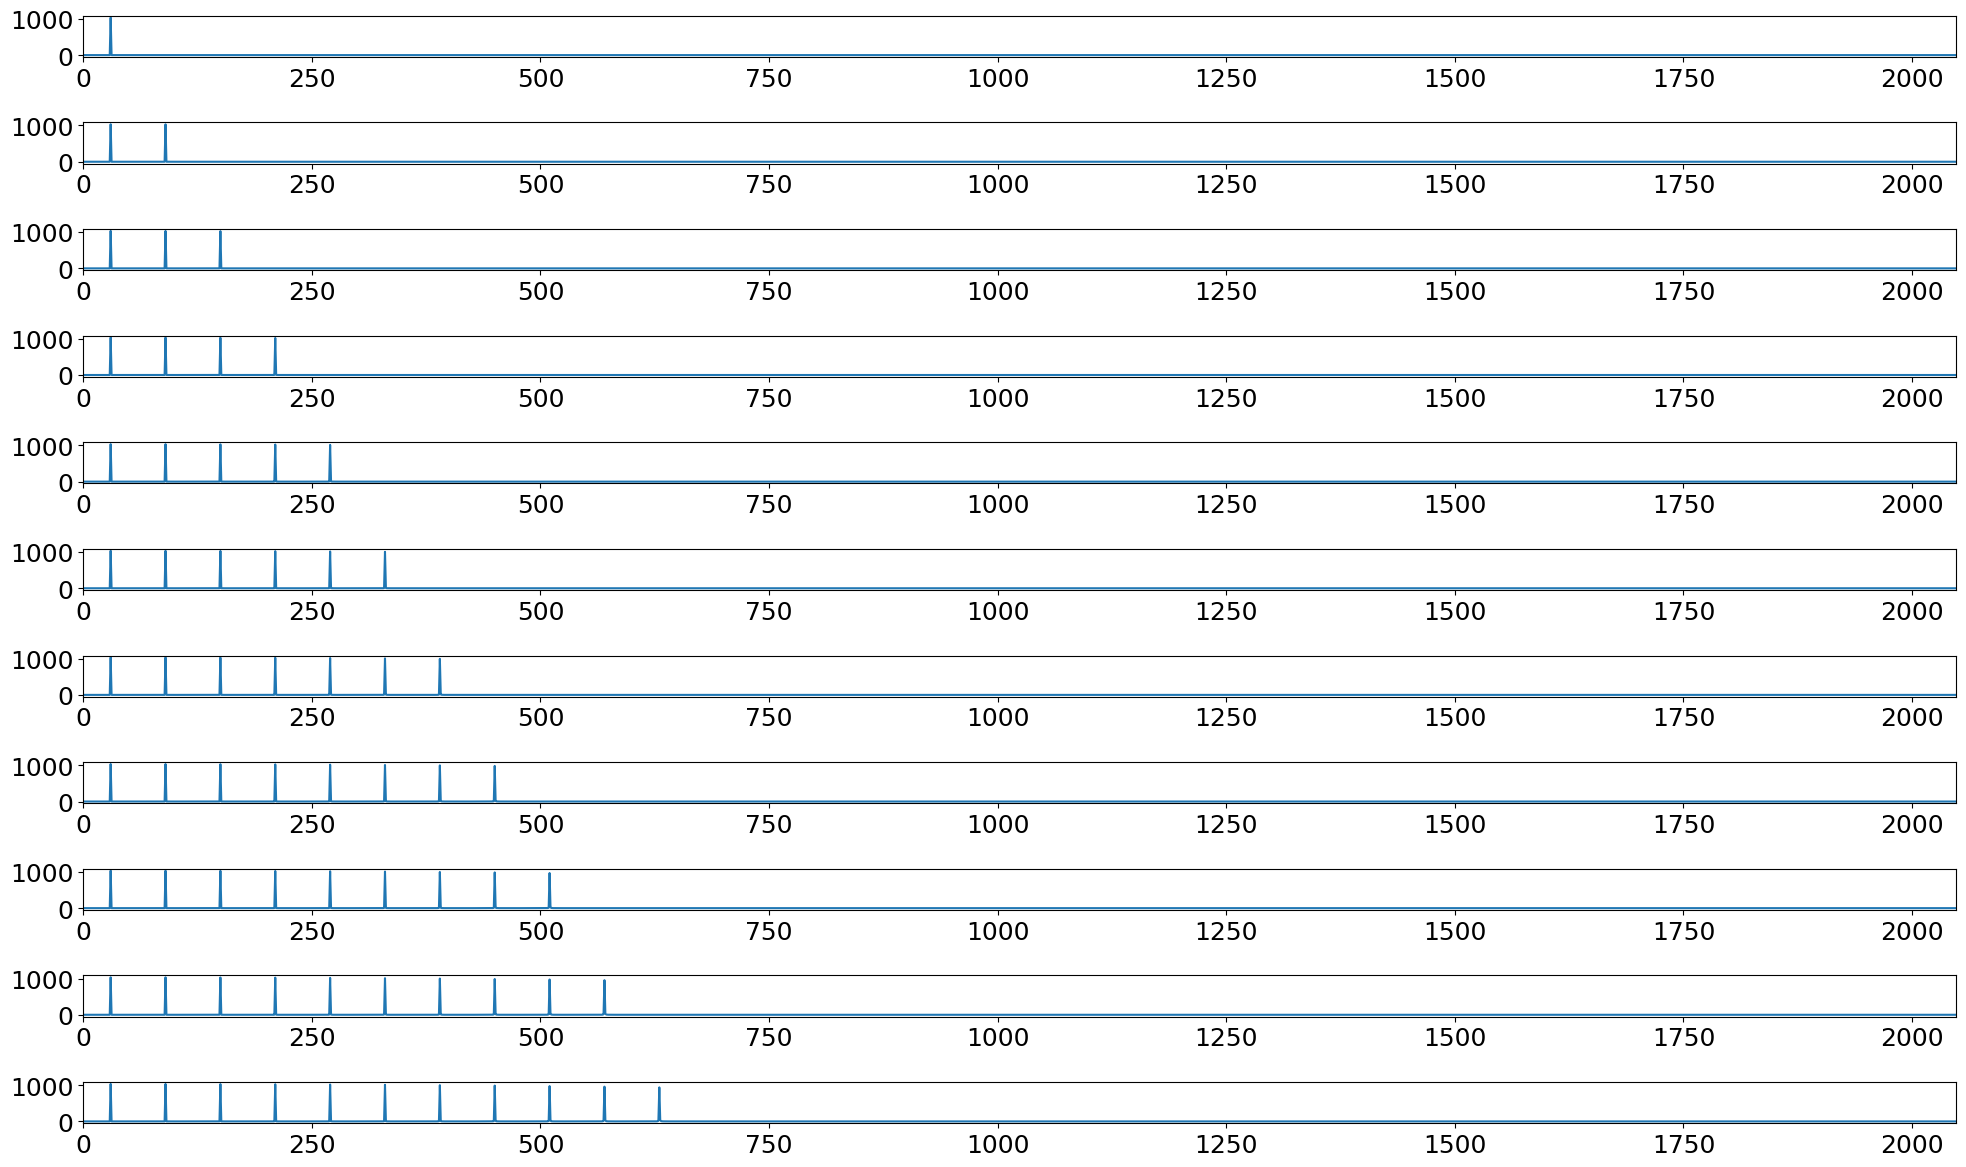

In [220]:
plt.rcParams['figure.figsize'] = [20, 12]
plt.rcParams.update({'font.size': 18})

fig,axs = plt.subplots(11,1)
axs = axs.reshape(-1)
ylim = (-2,2)
ylim_uni = (ylim[0]*3000, ylim[1]*3000)

for i, pt in enumerate(frequencies):
    axs[i].plot(abs(PSD_orig_per_p[0][i]))
    axs[i].set_xlim(0,n/2)

plt.tight_layout()
plt.show()

Plotting reconstructed above Nyquist frequency:

The same for all p

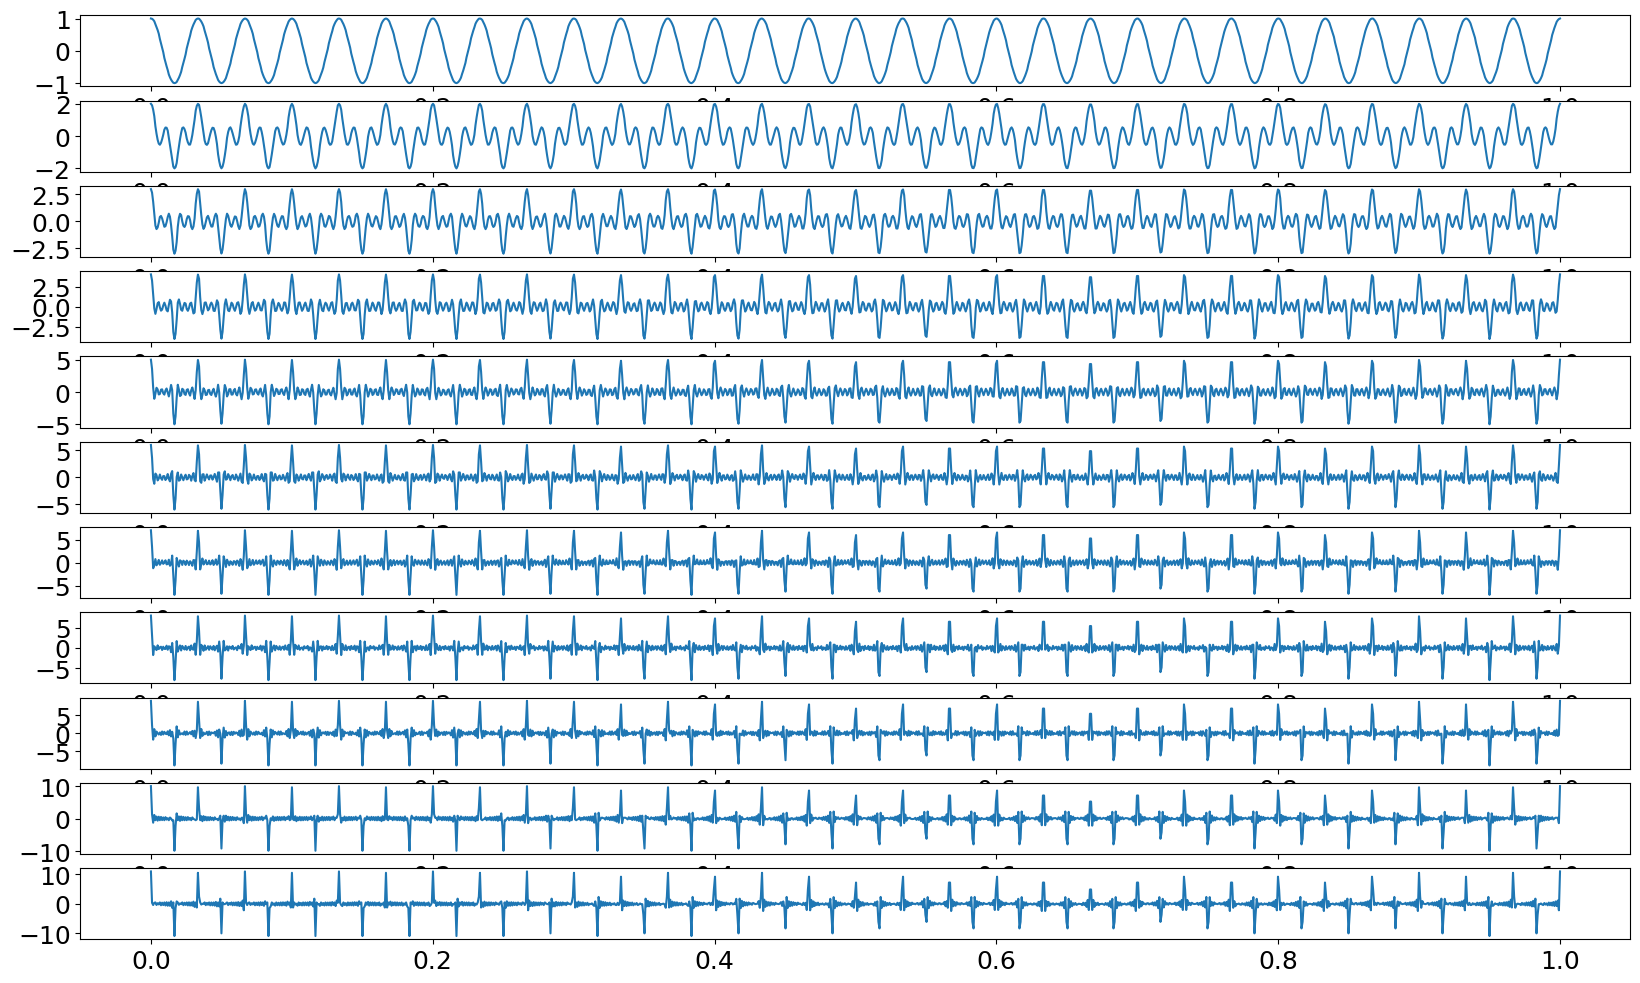

In [221]:
plt.rcParams['figure.figsize'] = [20, 12]
plt.rcParams.update({'font.size': 18})
t_recon = np.linspace(0,1,final_frequency * 2)

fig,axs = plt.subplots(11,1)
axs = axs.reshape(-1)
ylim = (-2,2)
ylim_uni = (ylim[0]*3000, ylim[1]*3000)

for i, pt in enumerate(frequencies):
    axs[i].plot(t_recon,recon_reg_per_p[0][i])

plt.show()

Plotting PSD of above Nyquist frequency reconstruction:

The placements of the peaks in the PSD should align with the frequencies of the signal (i.e. 30Hz, 90Hz, etc.). The peaks being spaced farther apart is a result of it being sampled. All 4096 points are not taken. If the samples taken are increased, it would look more like the PSD of the original signal. However, they are still evenly spaced.

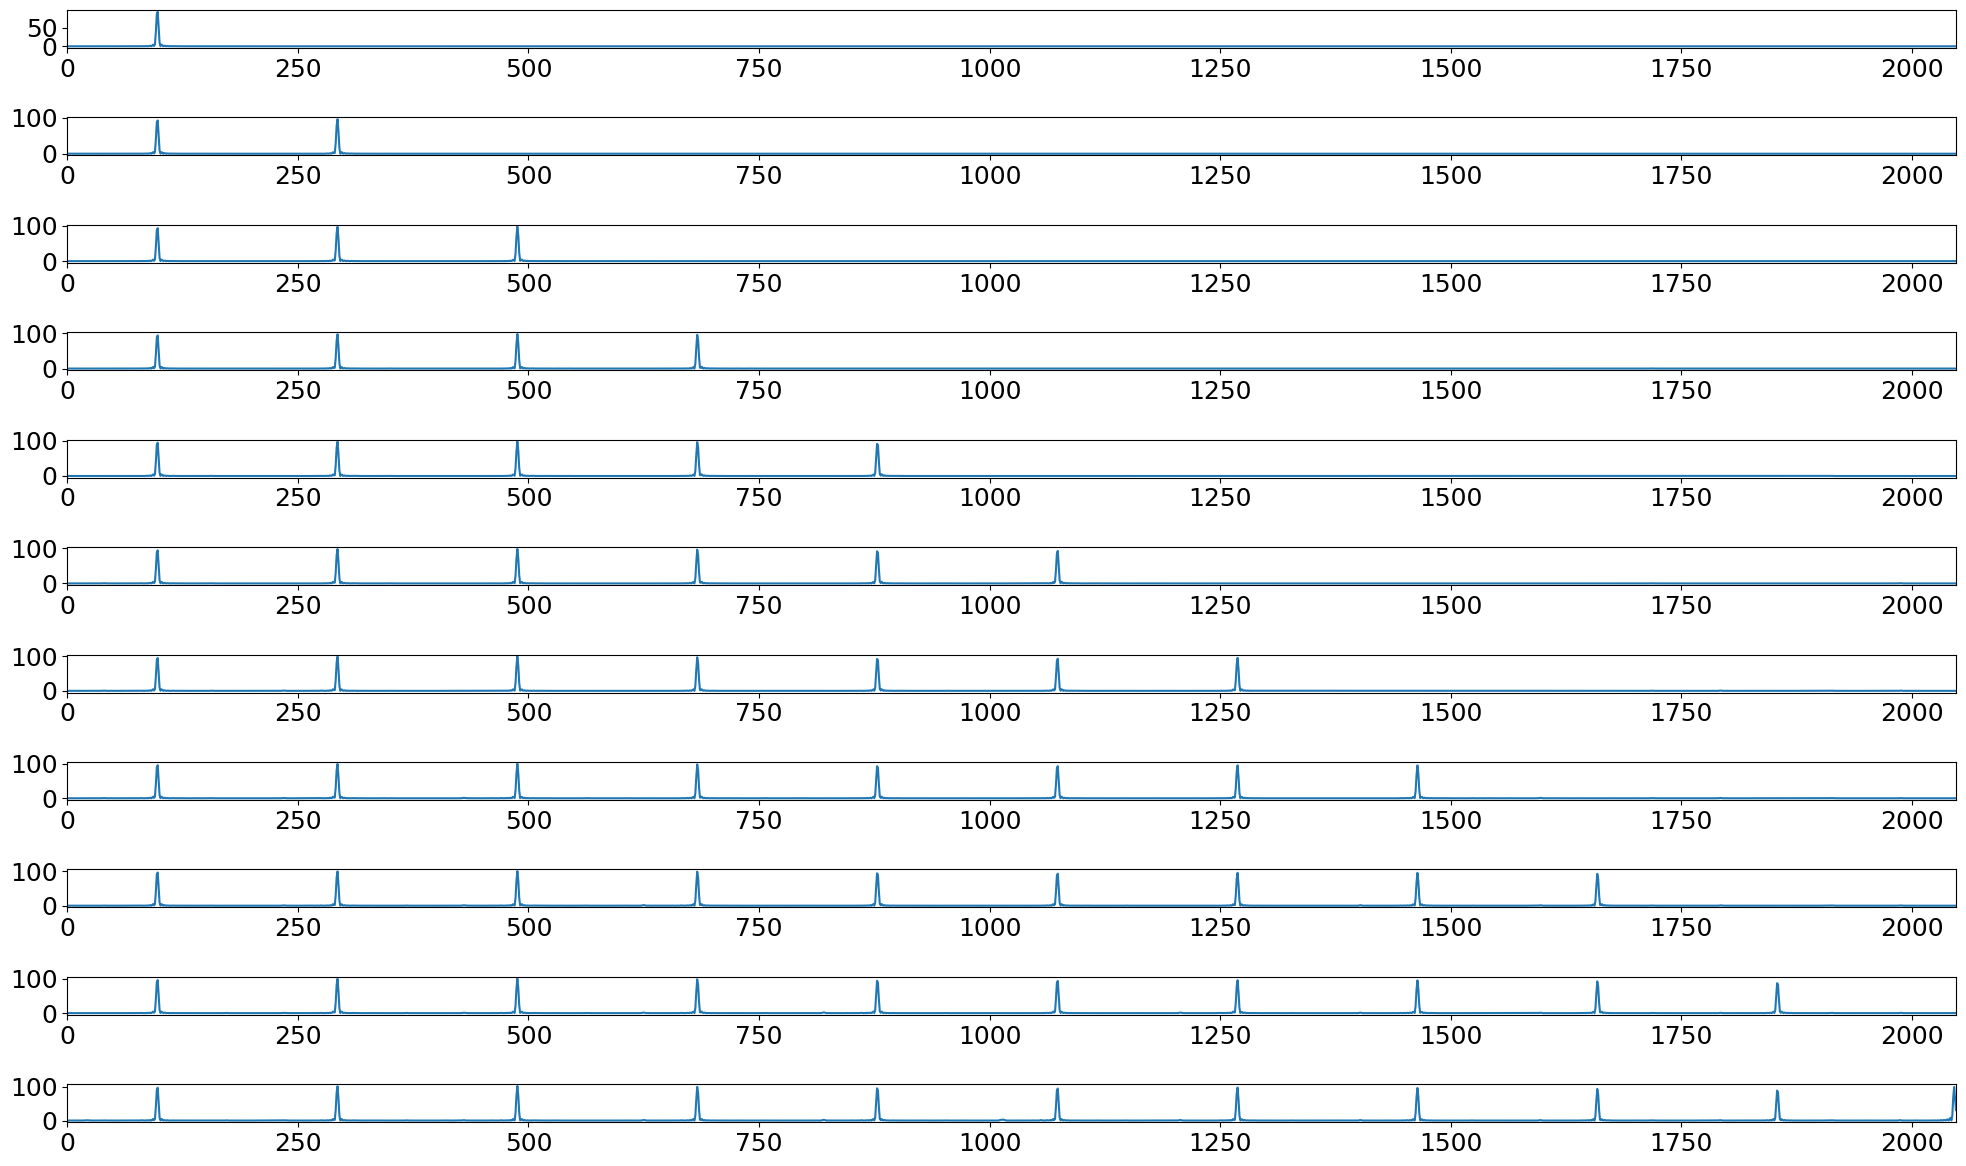

In [222]:
plt.rcParams['figure.figsize'] = [20, 12]
plt.rcParams.update({'font.size': 18})

fig,axs = plt.subplots(11,1)
axs = axs.reshape(-1)
ylim = (-2,2)
ylim_uni = (ylim[0]*3000, ylim[1]*3000)

for i, pt in enumerate(frequencies):
    axs[i].plot(abs(PSD_reg_per_p[0][i]))
    axs[i].set_xlim(0,n/2)

plt.tight_layout()
plt.show()

Plotting reconstructed sub-Nyquist frequency:

p = [8, 16, 32, 64]

Plotted below is p = 32

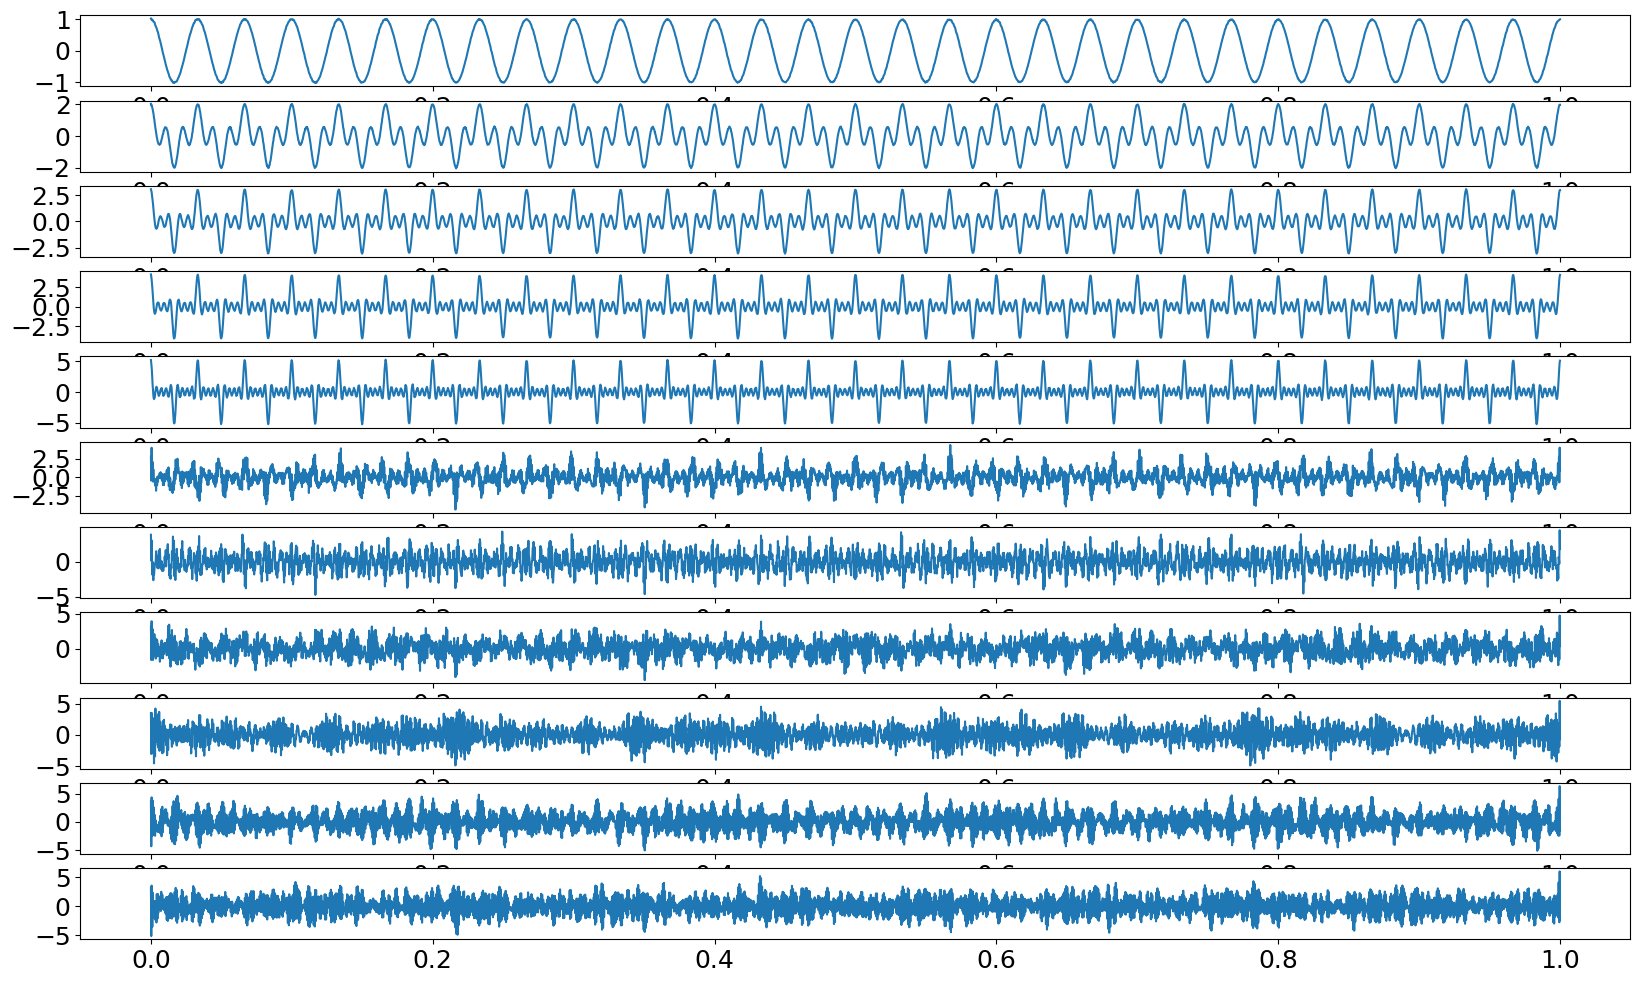

In [223]:
plt.rcParams['figure.figsize'] = [20, 12]
plt.rcParams.update({'font.size': 18})
t_recon = np.linspace(0,1,final_frequency * 2)

fig,axs = plt.subplots(11,1)
axs = axs.reshape(-1)
ylim = (-2,2)
ylim_uni = (ylim[0]*3000, ylim[1]*3000)

for i, pt in enumerate(frequencies):
    axs[i].plot(t,recon_sub_per_p[3][i])

plt.show()

Plotting PSD of sub-Nyquist reconstruction:

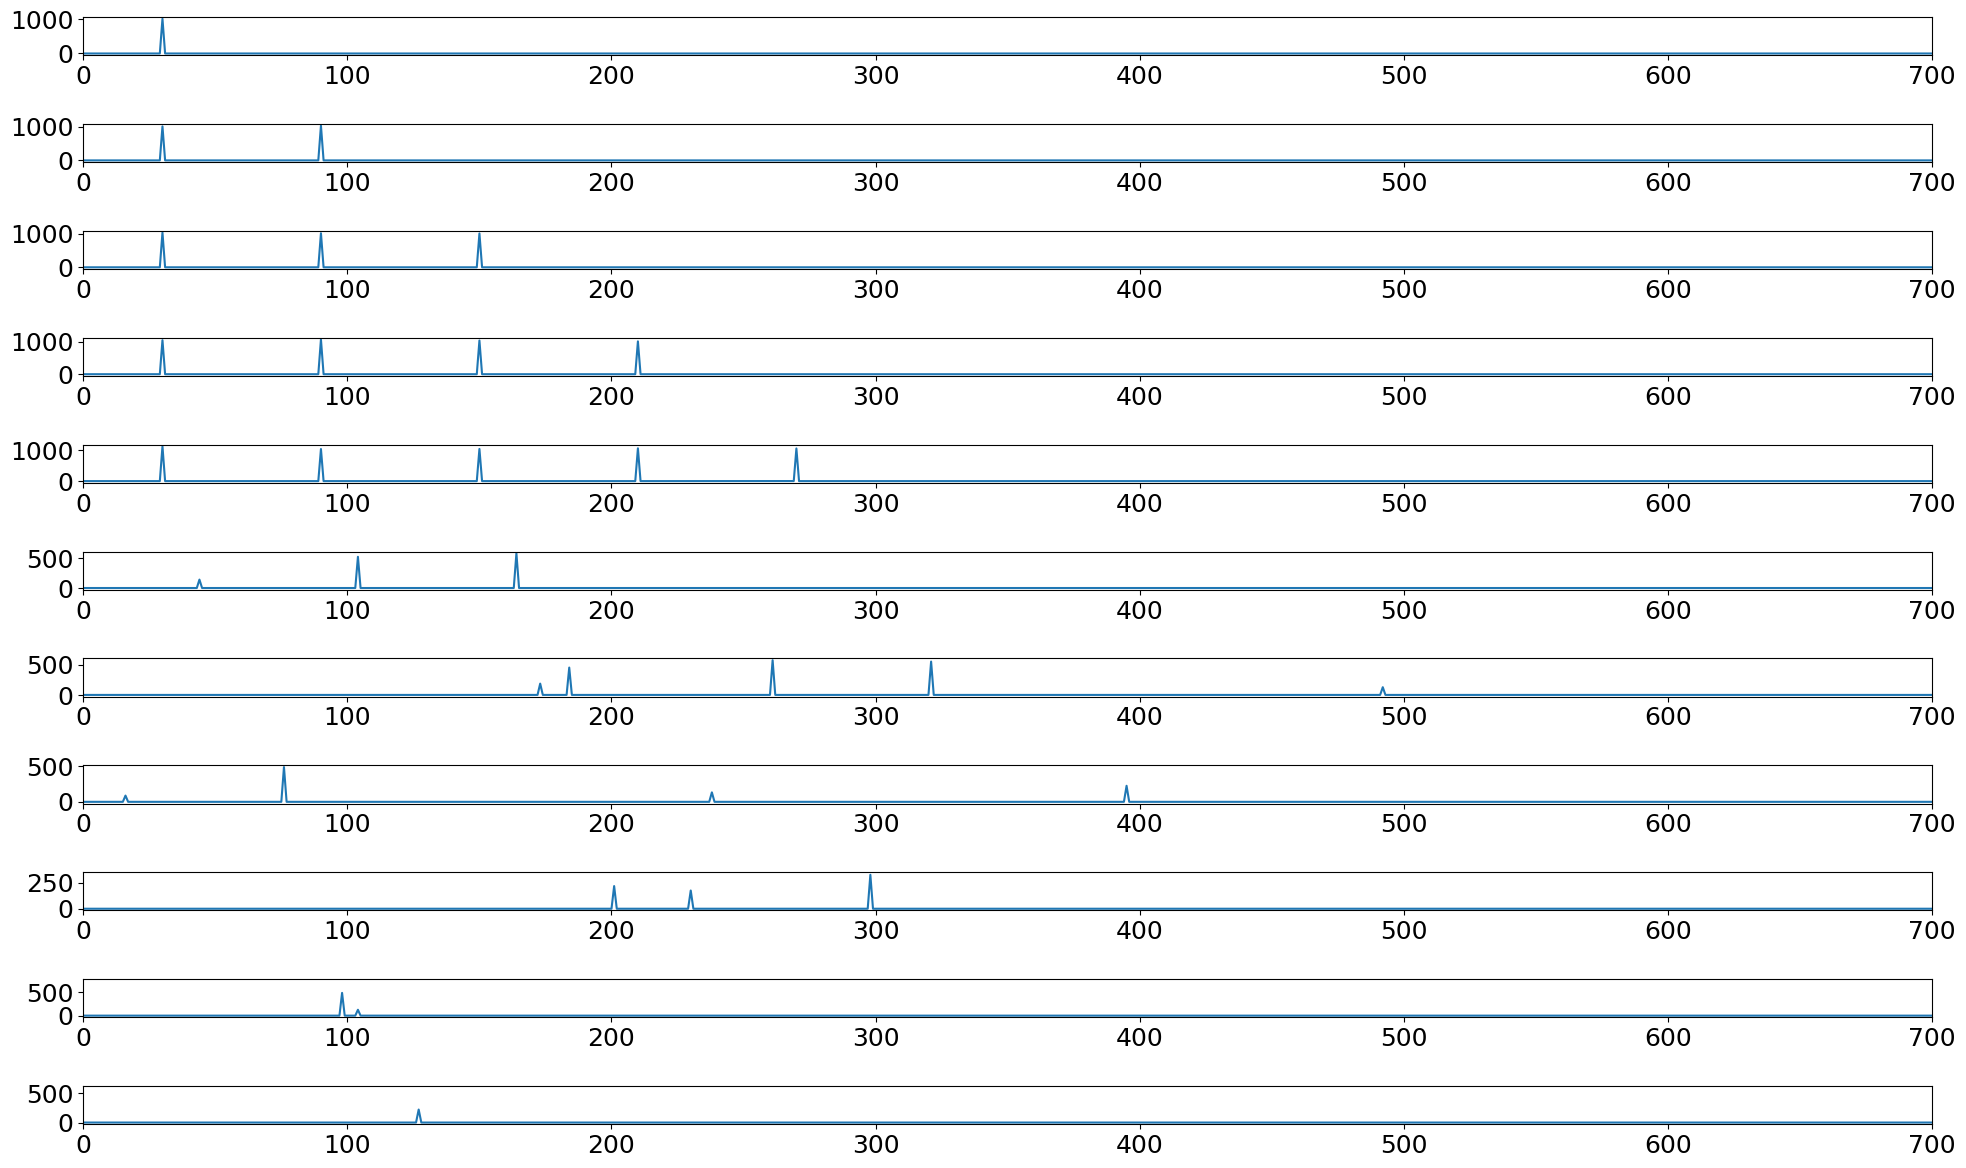

In [224]:
plt.rcParams['figure.figsize'] = [20, 12]
plt.rcParams.update({'font.size': 18})

fig,axs = plt.subplots(11,1)
axs = axs.reshape(-1)
ylim = (-2,2)
ylim_uni = (ylim[0]*3000, ylim[1]*3000)

for i, pt in enumerate(frequencies):
    axs[i].plot(abs(PSD_sub_per_p[3][i]))
    axs[i].set_xlim(0,700)

plt.tight_layout()
plt.show()

Error of reconstructed signal compared to original. Blue is above Nyquist frequency. Orange is sub-Nyquist.

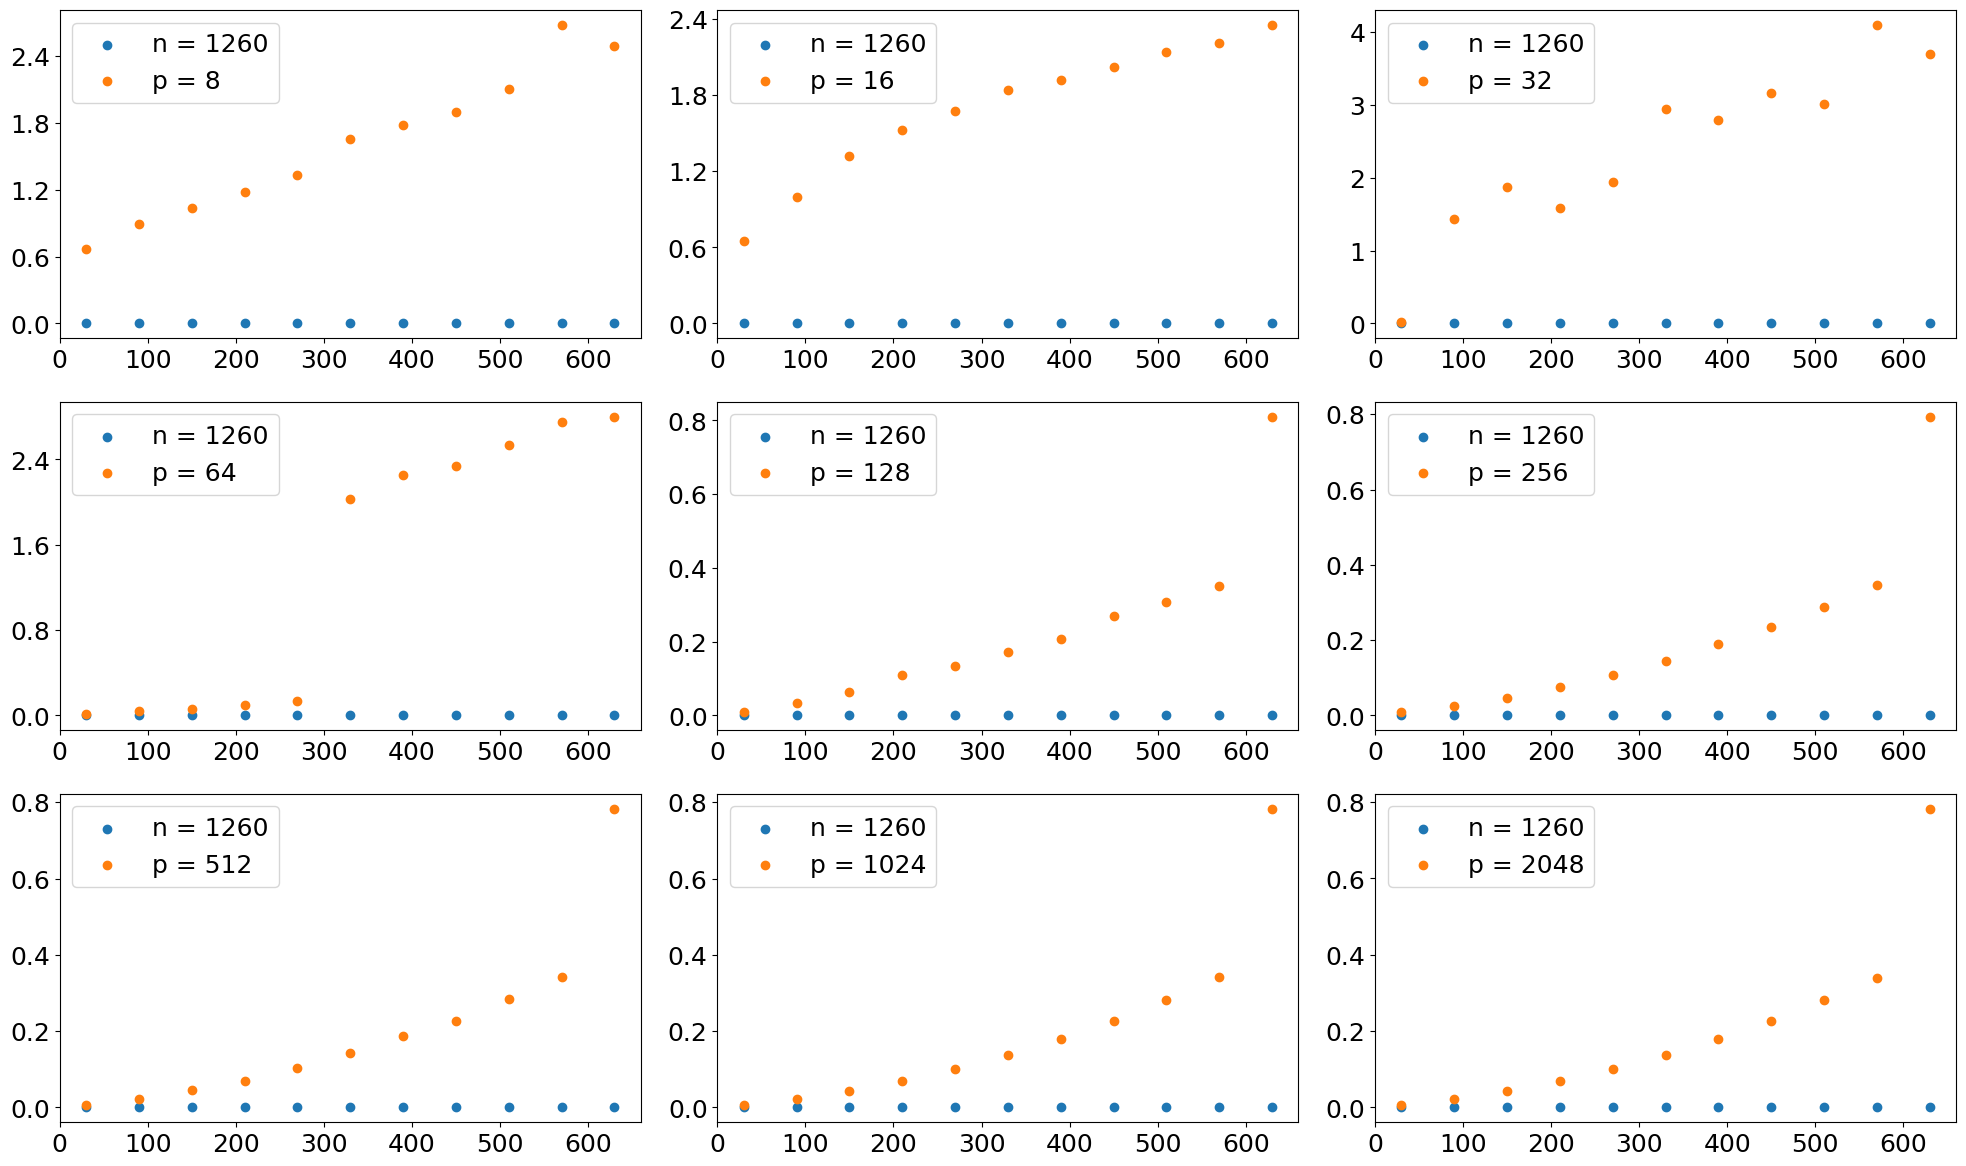

In [226]:
fig1,ax1 = plt.subplots(3,3)
ax1 = ax1.reshape(-1)

for i, error in enumerate(err_reg_per_p):
    ax1[i].scatter(frequencies,np.array(err_reg_per_p[i]).astype(float), label = "n = 1260")
    ax1[i].scatter(frequencies,np.array(err_sub_per_p[i]).astype(float), label = "p = " + str(p[i]))
    ax1[i].legend()

plt.tight_layout()

for ax in ax1:
    ax.tick_params(axis='y', labelrotation=0)

for ax in ax1:
    ax.yaxis.set_major_locator(plt.MaxNLocator(nbins=5))

Scratch Code:

In [51]:
# Basic Nyquist Sampling

n = 4096
t = np.linspace(0, 1, n)
x = np.cos(2 * 89 * np.pi * t) + np.cos(2 * 210 * np.pi * t)  # example signal

# Nyquist-rate sampling (uniform)
p_uniform = 1260
indices = np.linspace(0, n - 1, p_uniform, dtype=int)
x_nyquist_samples = x[indices]

# Create a full DCT matrix
Psi = dct(np.identity(n), norm='ortho')

# Simulate normal sampling by selecting p DCT coefficients directly
x_dct = dct(x_nyquist_samples, norm='ortho')
x_recon_nyquist = idct(x_dct, norm='ortho')  # inverse DCT

PSD_original = np.abs(np.fft.fft(x))**2 / n
PSD_recon_nyquist = np.abs(np.fft.fft(x_recon_nyquist))**2 / n

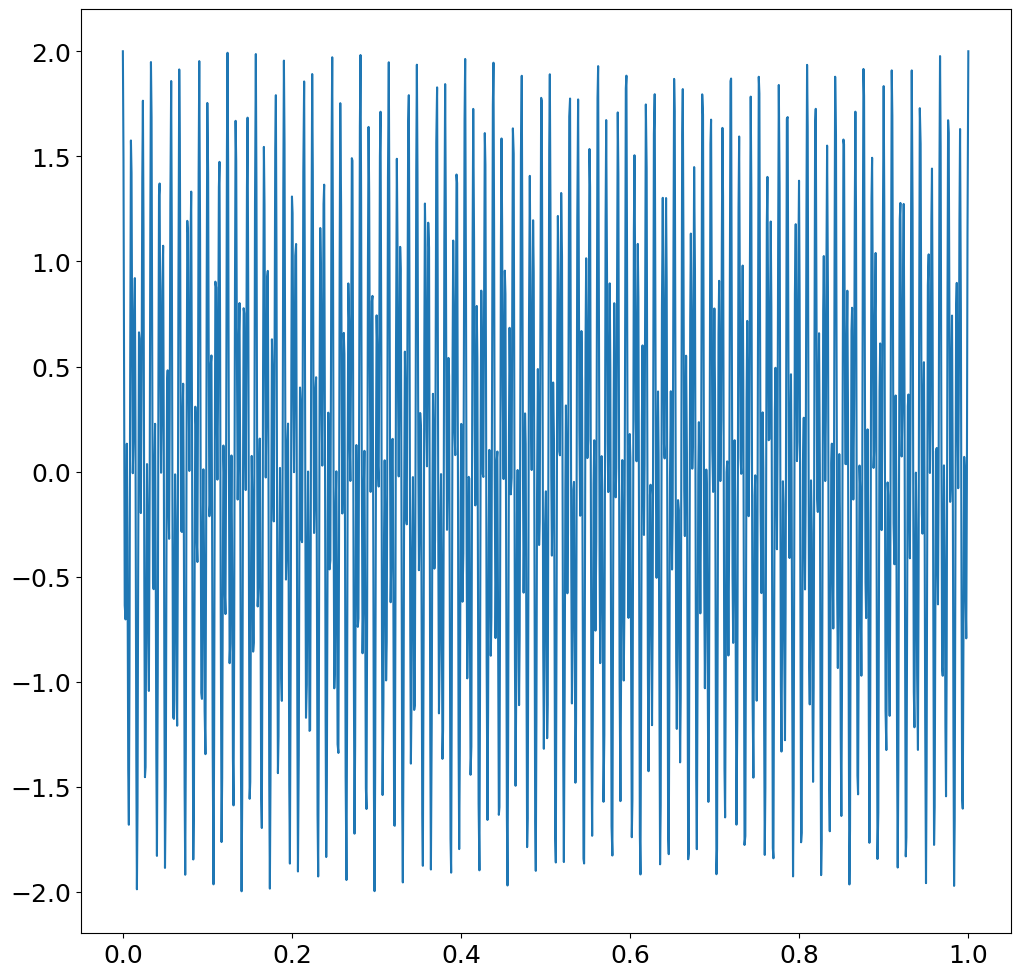

In [52]:
plt.plot(t[indices],x_recon_nyquist)

1260


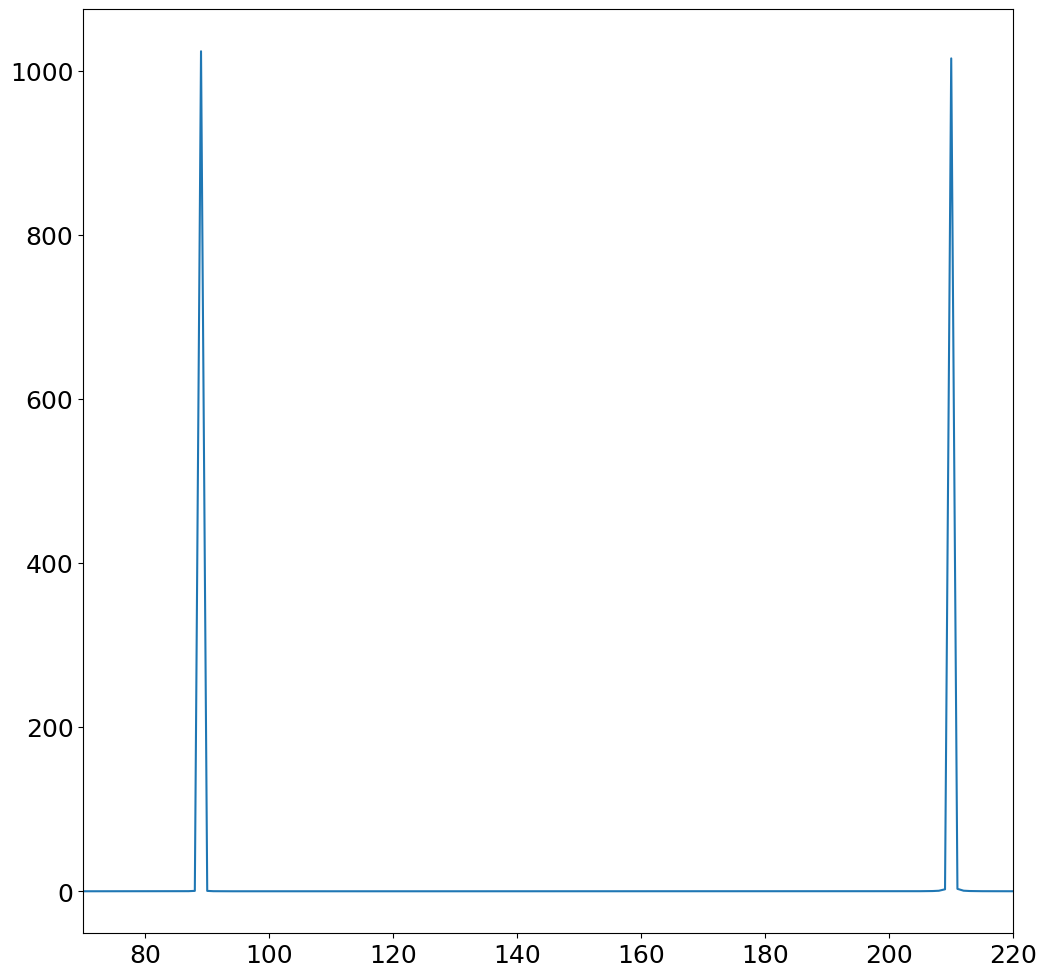

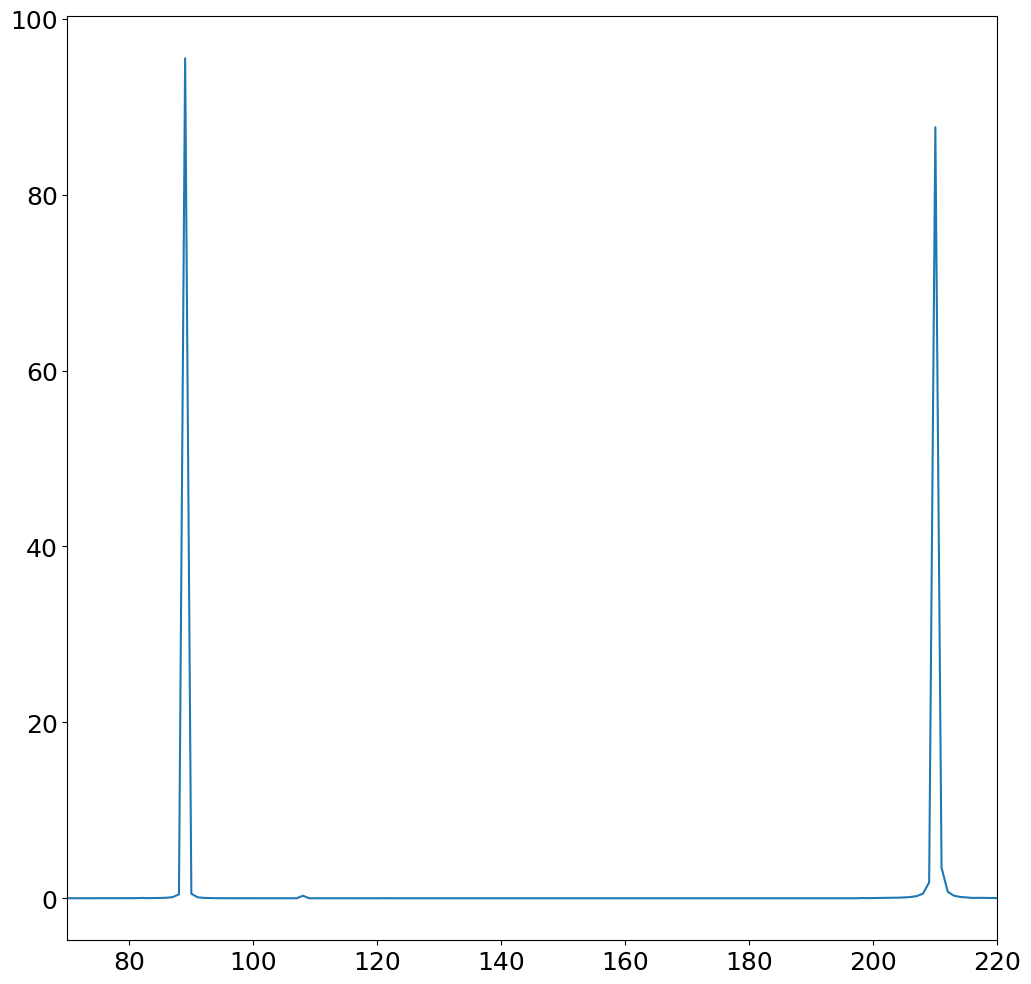

In [53]:
# print(len(PSD_original))
# print(p_uniform)
# print(indices)
print(len(indices))

plt.plot(PSD_original[:n//2])
plt.xlim(70,220)
plt.show()

# plt.plot(x)
# plt.show()

# plt.plot(x_recon_nyquist)
# plt.show()

plt.plot(PSD_recon_nyquist[:n//2])
plt.xlim(70,220)
plt.show()

In [93]:
n = 4096
t = np.linspace(0,1,n)
orig_signal = []

x = np.cos(2 * 30 * np.pi * t) # signal

for addfreq in range(90, 700, 60):
    signal = x.copy()
    orig_signal.append(signal)
    x += np.cos(2 * addfreq * np.pi * t)

[2.         1.98942122 1.95786837 ... 1.95786837 1.98942122 2.        ]


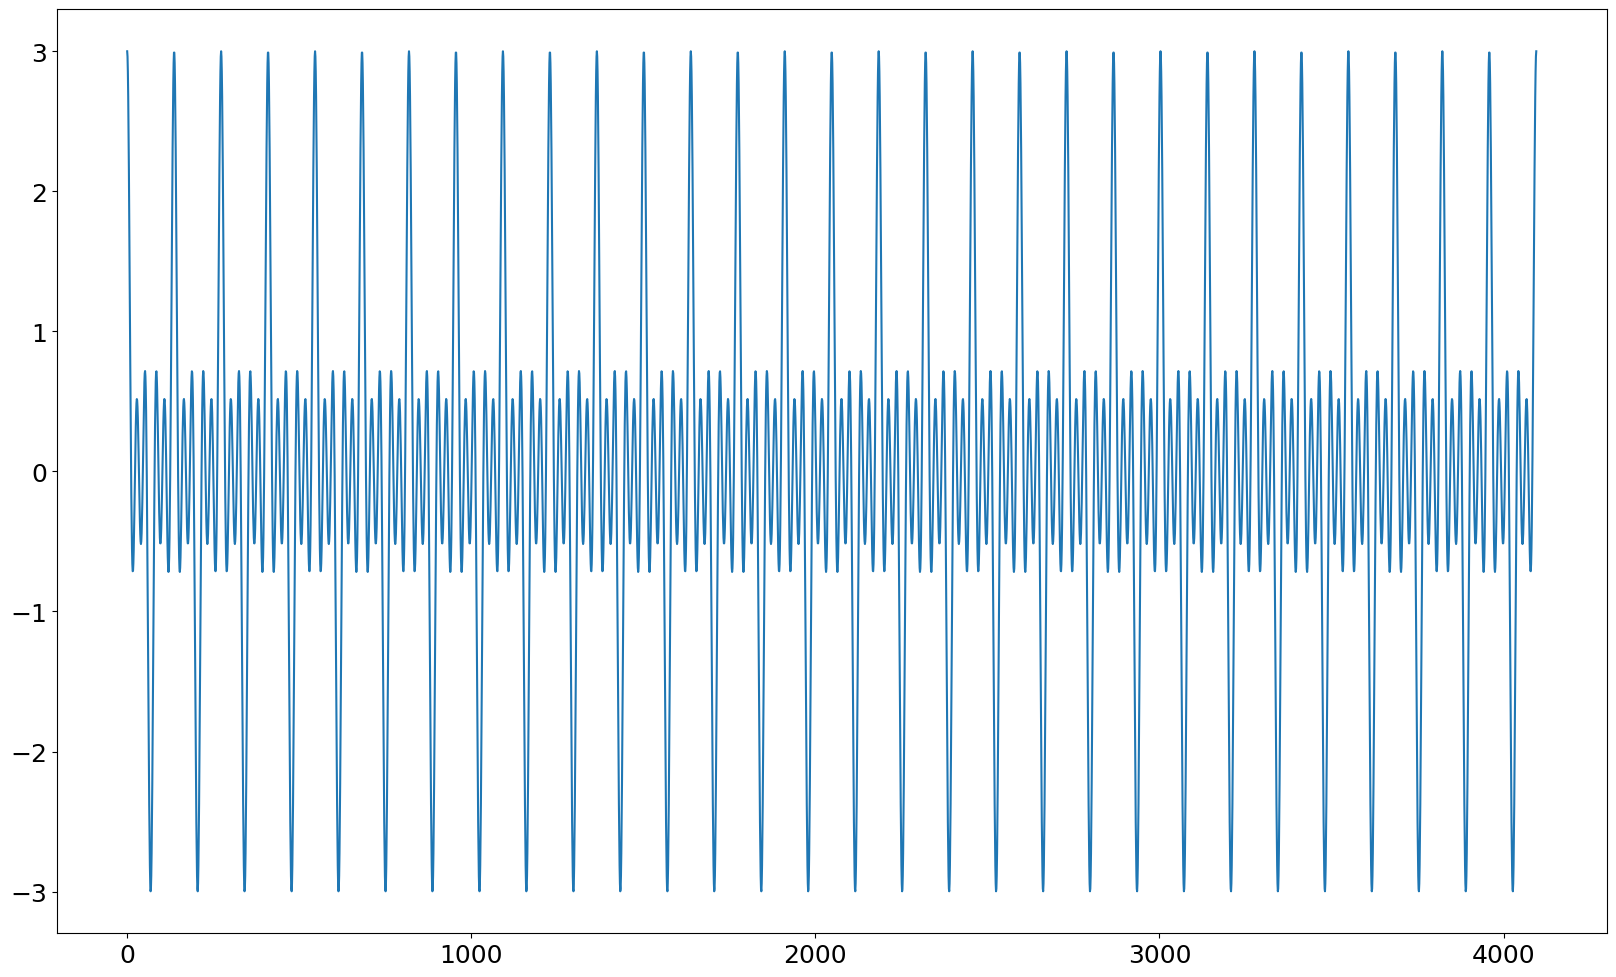

In [97]:
print(orig_signal[1])
plt.plot(orig_signal[2])